# Exploratory Data Analysis  
This notebook compiles basic methods to start exploring a dataset. The intention is not to create a definitive set of instructions but to allow you get started working on your data.  

We will be focusing on: 
* processing data with numpy and pandas
* basic ML processes using scikit-learn (outlier detection) 
* initial visualisations with matplotlib and seaborn
* some styling for matplotlib
* Interactive viz using plotly
* Exporting plotly to html and break it in to usable chunks. 

*if we have time, we can look at geographic representation of data as well*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("gapminder_full.csv")
df.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


## Histograms  
Histograms provide us with a good idea about the distribution of our data.  
Viewing the extreme ends of the data is valuable to understand outliers.

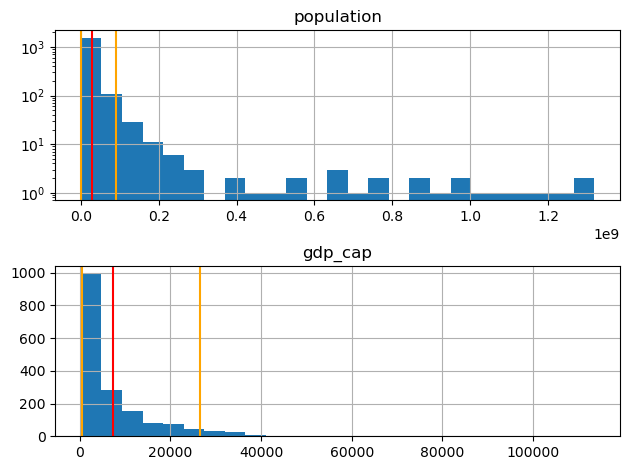

In [3]:
fig,axs = plt.subplots( nrows=2)

# Population
ax = axs[0]
col = "population"
df[col].hist( bins = 25, ax=ax )
ax.axvline( df[col].mean() , color = 'r')
ax.axvline( df[col].quantile(0.05) , color ='orange')
ax.axvline( df[col].quantile(0.95) , color = 'orange')
ax.set_yscale('log')
ax.set_title( col )

# GDP
ax = axs[1]
col = "gdp_cap"
df[col].hist( bins = 25, ax=ax )
ax.axvline( df[col].mean() , color = 'r')
ax.axvline( df[col].quantile(0.05) , color ='orange')
ax.axvline( df[col].quantile(0.95) , color = 'orange')
ax.set_title( col );

plt.tight_layout( h_pad=0.25 )

## Scatter plot and comparing 2 variables  
- Comparision
- HH & HL & LL & LH
- Multivariate outliers  

Outliers or Stories

In [4]:
print( df['year'].min(),"-",df['year'].max() )
df.groupby('country').size()

1952 - 2007


country
Afghanistan           12
Albania               12
Algeria               12
Angola                12
Argentina             12
                      ..
Vietnam               12
West Bank and Gaza    12
Yemen, Rep.           12
Zambia                12
Zimbabwe              12
Length: 142, dtype: int64

## Filter to 2007

In [5]:
df_2007 = df[ df['year'] == 2007 ].copy()
df_2007.head()

,country,year,population,continent,life_exp,gdp_cap
11,Afghanistan,2007,31889923,Asia,43.828,974.580338
23,Albania,2007,3600523,Europe,76.423,5937.029526
35,Algeria,2007,33333216,Africa,72.301,6223.367465
47,Angola,2007,12420476,Africa,42.731,4797.231267
59,Argentina,2007,40301927,Americas,75.320,12779.379640


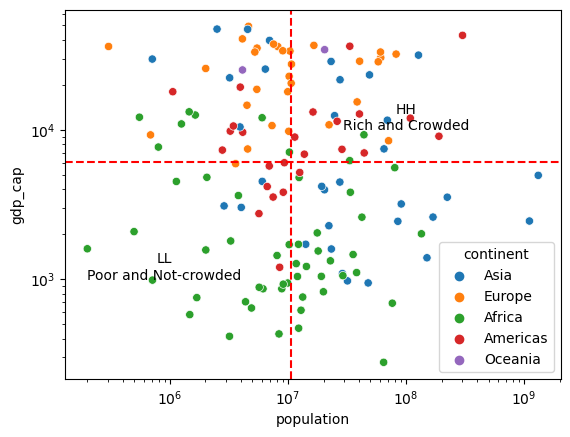

In [6]:

sns.scatterplot(
    data = df_2007,
    x = 'population' , y = 'gdp_cap',
    hue = 'continent'
)

plt.axvline( df_2007['population'].median() , color = 'r' , ls = "--")
plt.axhline( df_2007['gdp_cap'].median() , color = 'r' , ls = "--")

plt.annotate(
    text = "HH\nRich and Crowded",
    xy = (100000000,10000),
    ha = 'center'
)

plt.annotate(
    text = "LL\nPoor and Not-crowded",
    xy = (900000,1000),
    ha = 'center'
)

plt.xscale('log')
plt.yscale('log')

## Quantile - Percentile Cuts  
Quantiles buckets based distribution. 
There are better ways to make cuts such as Jenks Natural Breaks but quantiles are the easiest to explain


#### XX% of something is something by %YY of something.  
%1 rischest people in the world have %50 of all worlds wealth, etc...

In [7]:
# Create 10 bins based on quantile. 
# Quantiles bin same number of items in each bucket
df_2007['cut'] = pd.qcut(
    df_2007['population'],
    q = 10,
    labels=[f"{i+1}" for i in range(10)] # it requires labels
)

sums = df_2007.groupby('cut').sum()*100 / df_2007['population'].sum()

print( "%{} of all people in the world lives in the most populous 10 countries".format( sums.iloc[ sums.index == "10" ]['population'].astype(int).values[0] ) )


%67 of all people in the world lives in the most populous 10 countries


### Assign HH LL values to data.  
Using quantile cuts to assign categorical values.

In [8]:
bins = 3
df_2007['pop_quad'] = pd.qcut(
    df_2007['population'],
    q = bins,
    labels = ['H',"M","L"][::-1]
)

df_2007['gdp_quad'] = pd.qcut(
    df_2007['gdp_cap'],
    q = bins,
    labels = ['H',"M","L"][::-1]
)

HL = df_2007[
    (df_2007['pop_quad'] == "H") & 
    (df_2007['gdp_quad'] == "L")
].sort_values(by=['population','gdp_cap'] , ascending=[True,False])

HL


,country,year,population,continent,life_exp,gdp_cap,cut,pop_quad,gdp_quad
587,Ghana,2007,22873338,Africa,60.022,1327.608910,7,H,L
839,"Korea, Dem. Rep.",2007,23301725,Asia,67.297,1593.065480,7,H,L
1079,Nepal,2007,28901790,Asia,63.785,1091.359778,8,H,L
1595,Uganda,2007,29170398,Africa,51.542,1056.380121,8,H,L
11,Afghanistan,2007,31889923,Asia,43.828,974.580338,8,H,L
827,Kenya,2007,35610177,Africa,54.110,1463.249282,8,H,L
1523,Tanzania,2007,38139640,Africa,52.517,1107.482182,8,H,L
1451,Sudan,2007,42292929,Africa,58.556,2602.394995,9,H,L
1055,Myanmar,2007,47761980,Asia,62.069,944.000000,9,H,L
335,"Congo, Dem. Rep.",2007,64606759,Africa,46.462,277.551859,9,H,L


## Line Chart for Time Axis  
Where they always like this.   
& some styling on a chart

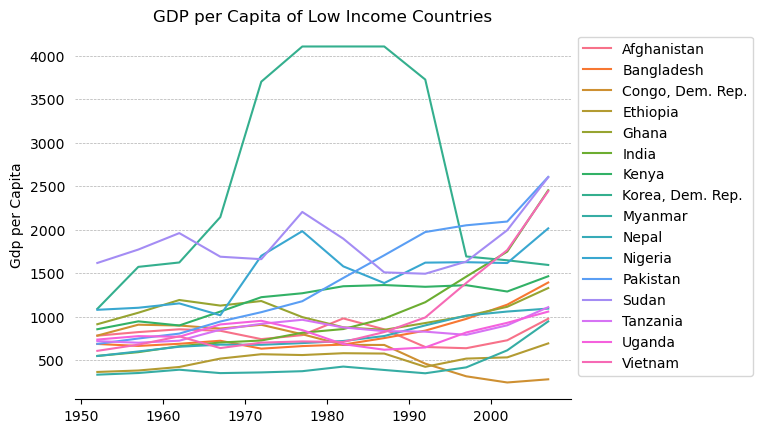

In [9]:

HL_time = df[ df['country'].isin(HL['country']) ].copy()

sns.lineplot(
    data = HL_time,
    x = 'year', y = 'gdp_cap',
    hue = 'country'
)
plt.title( "GDP per Capita of Low Income Countries" )
sns.despine( left = True )
plt.tick_params( left = False )
plt.grid( axis = 'y', lw = 0.5, ls = '--')
plt.xlabel('')
plt.ylabel('Gdp per Capita')
plt.legend(bbox_to_anchor=(1,1), loc="upper left");


## Percentage Change  
Have they been getting richer?  

### Intro to pivots

In [10]:
df.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


Text(0, 0.5, 'Gdp per Capita Change from 1952-2007')

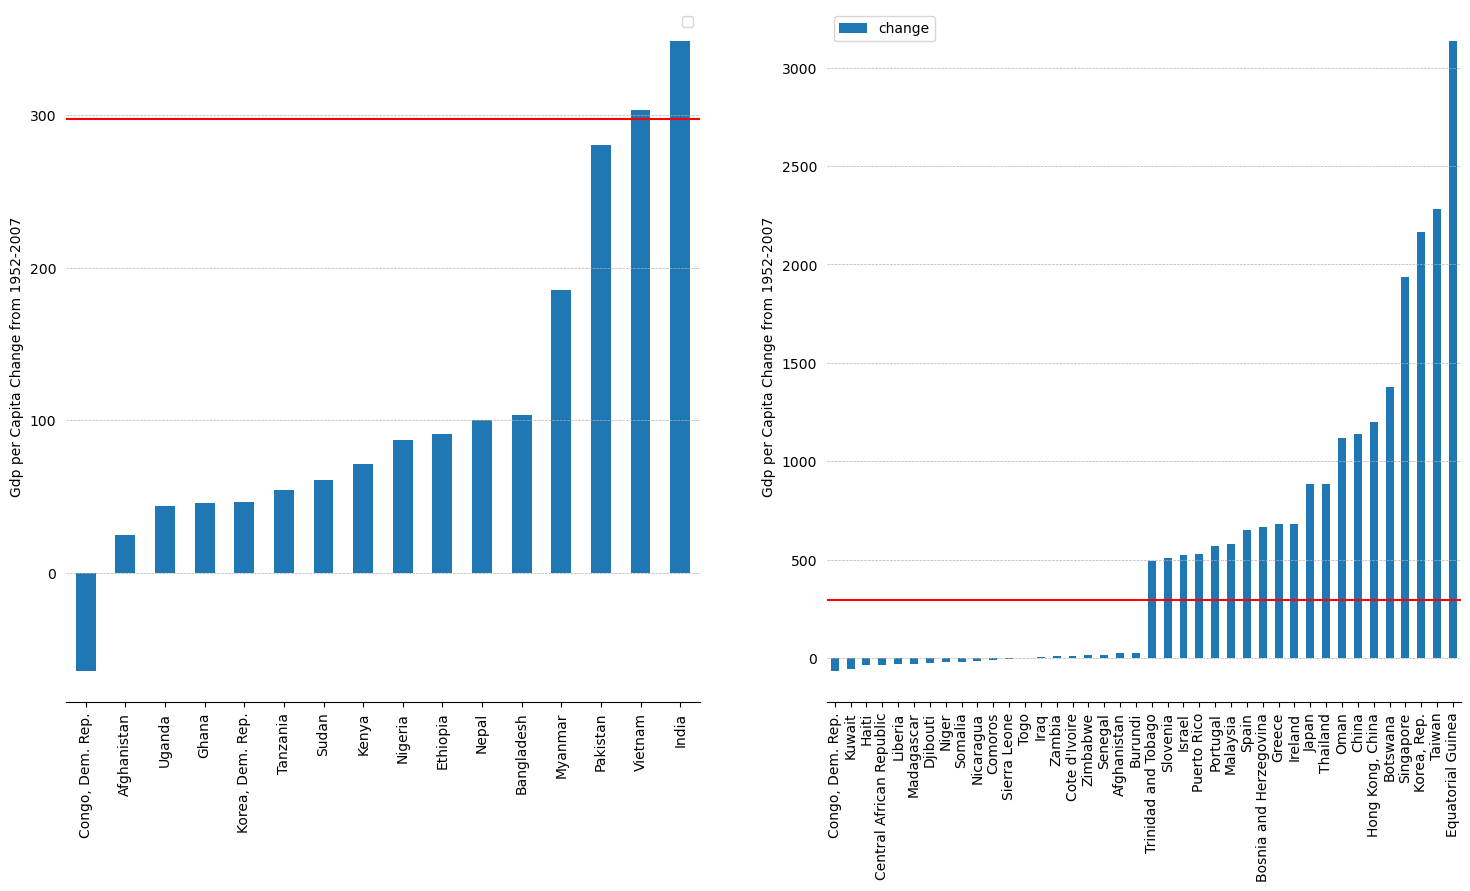

In [11]:

pop_change = df[ df['year'].isin([1952,2007]) ].pivot(
    columns='year',
    index='country'
)['gdp_cap']

pop_change['change'] = ((pop_change[2007] - pop_change[1952])*100 / pop_change[1952] ).round(1)

# HL's
fig,axs = plt.subplots(ncols=2 , figsize = (18,9) )
ax = axs[0]
pop_change[pop_change.index.isin(HL['country'])].sort_values(by='change').plot(kind='bar', y='change', ax=ax)
sns.despine( left = True , ax=ax )
ax.tick_params( left = False )
ax.grid( axis = 'y', lw = 0.5, ls = '--')
ax.set_xlabel('')
ax.set_ylabel('Gdp per Capita Change from 1952-2007')
ax.axhline( pop_change['change'].mean() , color = 'r')
ax.legend('')

# Top and Bottom
ax = axs[1]
top_bottom = pd.concat([pop_change.sort_values('change').head(20),pop_change.sort_values('change').tail(20) ])
top_bottom.plot(kind='bar', ax= ax, y='change' )
ax.axhline( pop_change['change'].mean() , color = 'r')
sns.despine( left = True , ax=ax )
ax.tick_params( left = False )
ax.grid( axis = 'y', lw = 0.5, ls = '--')
ax.set_xlabel('')
ax.set_ylabel('Gdp per Capita Change from 1952-2007')

## PIVOTS  
Create wide tables from long lists.  
Use aggregation functions to summarize data while doing this. 

In [196]:

df.loc[df['country']=='United States','continent'] = "N.America"
df.loc[df['country']=='Canada','continent'] = "N.America"

gdp_years = pd.pivot_table(
    data = df[['continent','year','gdp_cap']],
    index='continent',
    columns='year',
    values='gdp_cap',
    aggfunc='mean'
)

gdp_years

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
continent,,,,,,,,,,,,
Africa,1252.572466,1385.236062,1598.078825,2050.363801,2339.615674,2585.938508,2481.592960,2282.668991,2281.810333,2378.759555,2599.385159,3089.032605
Americas,3331.257418,3828.870267,4039.257189,4613.016687,5282.902029,5984.202738,6076.525040,6014.093091,6207.675810,6848.267941,6946.341872,8513.256632
Asia,5195.484004,5787.732940,5729.369625,5971.173374,8187.468699,7791.314020,7434.135157,7608.226508,8639.690248,9834.093295,10174.090397,12473.026870
Europe,5661.057435,6963.012816,8365.486814,10143.823757,12479.575246,14283.979110,15617.896551,17214.310727,17061.568084,19076.781802,21711.732422,25054.481636
N.America,12678.821600,13668.538590,14817.815705,17803.476800,20388.303400,23081.757595,23954.175640,28255.432720,29173.408250,32361.179460,36213.032310,39635.444050
Oceania,10298.085650,11598.522455,12696.452430,14495.021790,16417.333380,17283.957605,18554.709840,20448.040160,20894.045885,24024.175170,26938.778040,29810.188275


## HEATMAP

Text(0.5, 1.0, 'GDP over year per Continent')

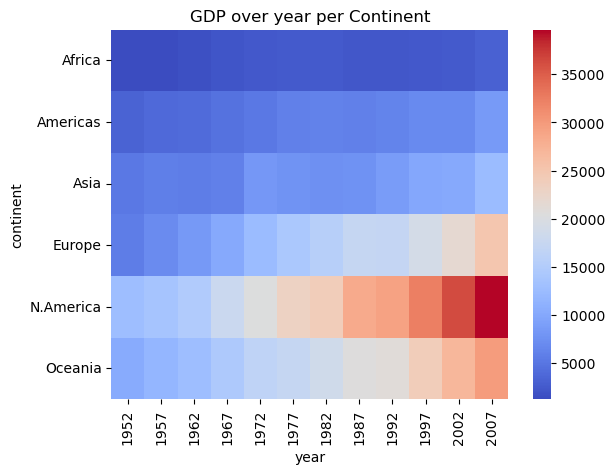

In [118]:
sns.heatmap(
    data = gdp_years,
    cmap = 'coolwarm'
)
plt.title("GDP over year per Continent")

## BOOTSTRAP  
A Statistical method for calculating values.  
Generates a bell-curve. Easy to represent and understand CI's

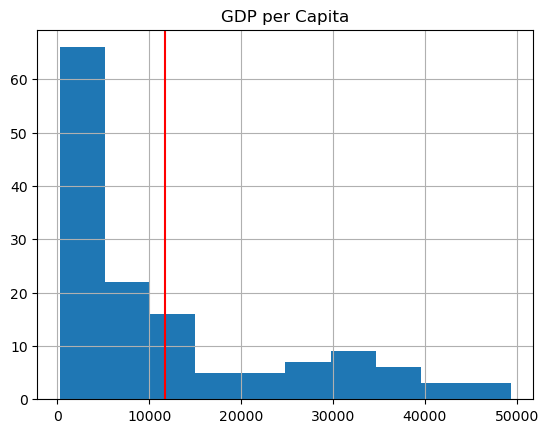

In [160]:

df_2007['gdp_cap'].hist()
plt.title("GDP per Capita")
plt.axvline( df_2007['gdp_cap'].mean() , color= 'r' )

In [83]:
df_2007 = df[ df['year']==2007 ]

df_2007.loc[
    df_2007['country'].isin(['United States','Canada']),
    "continent"
] = "N.America"


In [84]:
def q_05(s):
    return s.quantile(0.10)

def q_95(s):
    return s.quantile(0.9)

pt = df_2007.groupby('continent').agg({
    "gdp_cap":[q_05,'mean',q_95],
    # "population": [q_05,'mean',q_95]
})

pt

gdp_cap                            
                   q_05          mean          q_95
continent                                          
Africa       621.846156   3089.032605   9109.704283
Americas    3603.092094   8513.256632  13093.187008
Asia        1431.616130  12473.026870  31284.064116
Europe      9174.334138  25054.481636  36868.781895
N.America  36982.476818  39635.444050  42288.411282
Oceania    26110.044943  29810.188275  33510.331607

In [85]:
pt.columns = ["{}-{}".format(i1,i2) for (i1,i2) in pt.columns]

pt

,gdp_cap-q_05,gdp_cap-mean,gdp_cap-q_95
continent,,,
Africa,621.846156,3089.032605,9109.704283
Americas,3603.092094,8513.256632,13093.187008
Asia,1431.616130,12473.026870,31284.064116
Europe,9174.334138,25054.481636,36868.781895
N.America,36982.476818,39635.444050,42288.411282
Oceania,26110.044943,29810.188275,33510.331607


In [86]:
pt = pt.sort_values(by='gdp_cap-mean')

C:\Users\cansu\AppData\Local\Temp\ipykernel_5504\4204914049.py:10: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='both', nbins=10)


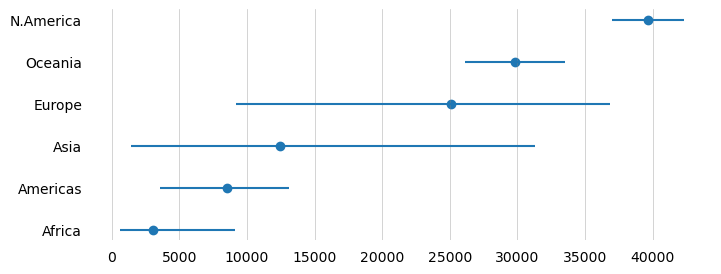

In [87]:
plt.figure( figsize=(8,3) )
plt.scatter( y = pt.index , x=pt['gdp_cap-mean'])
plt.hlines( y=pt.index, xmin=pt['gdp_cap-q_05'], xmax=pt['gdp_cap-q_95'])

sns.despine( left=True, bottom=True )
plt.tick_params(axis='x', bottom=False )
plt.tick_params(axis='y', left=False )
plt.grid(axis='x', color='#868686', lw=0.5, alpha=0.5)

plt.locator_params(axis='both', nbins=10)
  